# [E-10]CIFAR-10 IMAGE ( CIFAR-10 이미지  )
_____

## 목차
### 1. 개요
    1.1 들어가기에 앞서
    1.2 루브릭 평가기준
 
### 2. 프로젝트: CIFAR-10 이미지 생성하기
    2.1 데이터셋 구성하기
    2.2 생성자 모델 구현하기
    2.3 판별자 모델 구현하기
    2.4 손실함수와 최적화 함수 구현하기
    2.5 훈련과정 상세 기능 구현하기
    2.6 학습 과정 진행하기
    
### 3. 결론
    3.1 결론
    3.2 참조
    3.3 회고

-----

## 1. 개요
### 1.1 들어가기에 앞서

#### 학습목표

- 생성 모델링 개념을 이해하며 판별 모델링과의 차이 알기
- Pix2Pix, CycleGAN 등의 이미지 관련 다양한 생성 모델링의 응용을 접하며 흥미 가지기
- Fashion MNIST 데이터셋의 의미를 알기
- 생성적 적대 신경망(GAN)의 구조와 원리를 이해하기
- 텐서플로우로 짠 DCGAN 학습 코드를 익히며 응용하기

---
### 모델링 및 기법

#### GAN(Generative Adversarial Network) 모델

![111](https://d3s0tskafalll9.cloudfront.net/media/images/GAN.max-800x600.png)

GAN: 서로 상반된 작용을 하는 두 파트를 묶어서, 하나의 기능으로 동작하는 적대적(Adversarial) 네트워크

- 생성자와 판별자 두 가지 네트워크 모두 사용됨

- GAN의 단점은 매번 학습할때마다 그 결과가 불안정한 문제점이 있음

- 추후 GAN을 개선하는 목적하에 DCGAN이 생겨남

---

#### AWS: DeepComposer 모델

![1](https://cdn.vox-cdn.com/thumbor/o3QkolOqKd1E1Yg7pYPeJSfD3VI=/1400x1050/filters:format(jpeg)/cdn.vox-cdn.com/uploads/chorus_asset/file/19429723/EK40lhpXYAE7su6.jpg)

DeepComposer: 이 모델은 AWS가 발표한 AI 서비스가 결합된 세계 최초의 음악 키보드이다.

- 생성 모델로 기존의 디자인을 개선한 예로, 안테나의 구조/우주 탐사선/모형 치아 등이 있음

- 이 생성 모델에는 생성자(Generator),판별자(Discriminator) 네트워크가 사용됨

- 생성자는 오케스트라처럼 직접 음악을 연주하여 만들어내는 모델로 비유
- 판별자는 음악이 점점 더 좋아지게 만드는 지휘자의 역할을 모델로 비유

---

#### Pix2Pix 모델

![2](https://d3s0tskafalll9.cloudfront.net/media/images/pix2pix.max-800x600.png)

![3](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fczqqmo%2FbtqGRozZkRW%2FqK84BnNkv2h1XOxlwWx2k1%2Fimg.jpg)

Pix2Pix: 이 모델은 간단한 이미지를 입력할 경우 실제 사진처럼 보이도록 바꿔줄 때 많이 사용되는 모델이다.

- 한 이미지를 다른 이미지로 픽셀 단위 변환한다는 뜻으로 'Pixel to Pixel'을 따서 이름이 지어짐

- 학습을 진행할 때는 단순화된 이미지(Input Image) 와 실제 이미지(Ground Truth)가 쌍을 이루는 데이터셋(paired data)으로 진행

- 사진처럼 왼쪽에 Input Image를 입력받으면, 내부 연산을 통해 실제 사진 같은 형상으로 변환된 Predicted Image를 출력

- 계속하여 Predicted Image가 Ground Truth와 얼마나 비슷한지를 평가하며 점차 실제 같은 결과물을 만들어내는 과정 

---

#### CycleGAN 모델

![4](https://d3s0tskafalll9.cloudfront.net/media/images/CycleGAN.max-800x600.png)

CycleGAN: 이 모델은 실사 이미지를 그림으로 바꾸는 것과 그림을 실사 이미지로 바꾸는 것 두 가지가 모두 가능함

- Pix2Pix는 한 방향으로의 변환만 가능했다면, CycleGAN은 양뱡향으로의 이미지 변환이 가능함

- Pix2Pix는 쌍을 이루는 데이터셋만 필요했다면, CycleGAN은 Unpaired 데이터 셋을 학습한다는 것이다. 예를 들어 위 사진의 예로, 얼룩말이 있는 사진과 말이 있는 사진 각각의 데이터셋만 있다면 CycleGAN을 학습시킬 수 있음

- 데이터를 구하기 훨씬 쉽고, 라벨을 붙이는 주석(annotation) 비용이 필요 없다는 장점이 있음

---

#### Neural Style Transfer 기법

![5](https://d3s0tskafalll9.cloudfront.net/media/images/StyleTransfer.max-800x600.png)

Neural Style Transfer: 전체 이미지의 구성을 유지하는 Base Image와 스타일이 담긴 Style Image 두 장을 섞어내어 새로운 이미지를 만들어내는 기법

- Base Image의 내용은 잃지 않으면서, Style Image의 스타일을 효과적으로 입히기 위한 정교한 손실 함수들이 포함


---
### 이론 정리

생성 모델링 (Generative Modeling)

> 없던 데이터를 생성해 내는 것이 목표인 모델링

판별 모델링 (Discriminative Modeling)

> 직접 입력받은 데이터를 어떤 기준에 대해서 판별하는 것이 목표인 모델링

GAN에서의 생성자

> 생성자(Generator)는 아무 의미 없는 랜덤 노이즈로부터 신경망에서의 연산을 통해 이미지 형상의 벡터를 생성해 냅니다. 즉, 무에서 유를 창조하는 것과 같은 역할을 합니다.

GAN에서의 판별자

> 판별자(Discriminator)는 기존에 있던 진짜 이미지와 생성자가 만들어낸 이미지를 입력받아 각 이미지가 Real 인지, Fake 인지에 대한 판단 정도를 실숫값으로 출력합니다.

GAN에서의 손실함수

> GAN은 손실함수로 교차 엔트로피(Cross Entropy)를 사용. 교차 엔트로피는 점점 가까워지기 원하는 두 값이 얼마나 큰 차이가 나는지
정량적으로 계산할 때 많이 쓰인다. 판별자의 경우에는 가짜인지 진짜인지를 가려내야 하기 때문에 이진 분류 문제이므로, 이진 교체 엔트로피(binary cross entropy)를 사용



---

### 1.2 루브릭 평가기준
평가문항|상세기준
-|-
1. GAN의 두 모델 구조를 통해 이미지를 성공적으로 생성하였다.|오브젝트 종류를 육안으로 구별할 수 있을 만한 이미지를 생성하였다.
2. 생성 이미지 시각화 및 학습 그래프를 통해 GAN 학습이 바르게 진행되었음을 입증하였다.|gif를 통해 생성이미지 품질이 서서히 향상되는 것과, fake accuracy가 추세적으로 0.5를 향해 하향하고 있음을 확인하였다.
3. 추가적인 GAN 모델구조 혹은 학습과정 개선 아이디어를 제안하고 이를 적용하였다.|제출 아이디어를 제출 프로젝트에 반영하고, 그 결과가 아이디어 적용 이전보다 향상되었음을 시각적으로 입증하였다.

---

## 2. 프로젝트: CIFAR-10 이미지 생성하기

### 2.1 데이터셋 구성하기

In [1]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

- 필요한 패키지, 모듈 불러오기

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

- tf.keras 안에 있는 CIFAR-10 데이터를 꺼냄
- load_data()로 데이터를 로딩
- 32x32x3 이미지 5만장

In [3]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


- 정규화를 시킬 예정이므로, 픽셀값 확인(0~255의 정숫값)

In [4]:
train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


- 학습에 사용할 train_x의 이미지를 -1, 1로 정규화

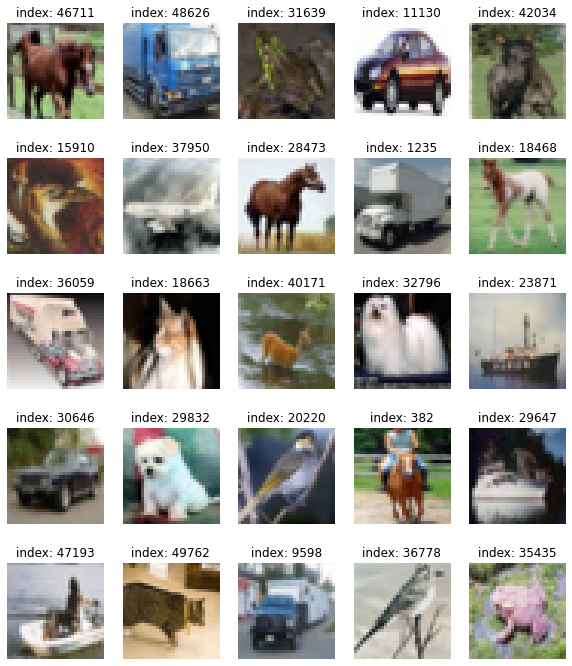

In [5]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_index = np.random.randint(1, 50000)
    plt.imshow((train_x[random_index]+1)/2.0)
    plt.title(f'index: {random_index}')
    plt.axis('off')

plt.show()

- figsize=(10, 12)는 이미지 전체 프레임의 크기
- 25개의 이미지를 5x5 배열 형태로 시각화

In [6]:
BUFFER_SIZE = 50000
BATCH_SIZE = 128

train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

- BUFFER_SIZE은 전체 데이터에 맞게 50000으로 설정
- shuffle()함수로 데이터셋을 잘 섞어 모델에 넣어줄 것
- tf.data.Dataset 모듈의 from_tensor_slices() 함수를 사용하여 미니배치 데이터셋을 구성
- train_x라는 넘파이 배열(numpy ndarray)형 자료를 섞고, 이를 배치 사이즈에 따라 나누도록 함

---

### 2.2 생성자 모델 구현하기
- (32, 32, 3)의 shape를 가진 이미지를 생성하는 생성자 모델 구현 함수를 작성해 보기.
- noise = tf.random.normal([1, 100])로 생성된 랜덤 노이즈를 입력으로 하여 방금 구현한 생성자로 랜덤 이미지를 생성해 보기.
- 생성된 랜덤 이미지가 생성자 출력 규격에 잘 맞는지 확인해 보기.

In [7]:
def make_generator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Dense layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Dropout(0.5))

    # Second: Reshape layer
    model.add(layers.Reshape((8, 8, 256)))

    # Third: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.01))

    # Fourth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.01))

    # Fifth: Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, \
                                     activation='tanh'))

    return model

- make_generator_model 함수로 언제든 생성자를 생성할 수 있도록 함
- tf.keras.Sequential()로 모델 레이어 쌓기
- 입력된 벡터는 첫 번째 Dense 레이어를 거치며 (batch_size,16384) 형상의 벡터가 됨
- 첫 번째 레이어를 거친 후 Reshape 레이어를 지나는데 (8, 8, 256) 형상의 3차원 벡터로 변환시키는 작업
- Conv2DTranspose는 이미지 사이즈를 넓혀주는 레이어
- (8, 8, 128) > (16, 16, 64) > (32, 32, 3) 순으로 커짐
- BatchNormalization는 가중치 값을 정규화 시켜주는 레이어
- 활성화 함수는 모두 LeakyReLU를 사용하고 마지막만 tanh를 사용


In [8]:
generator = make_generator_model()
generator
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
dropout (Dropout)            (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         5

- 생성 모델을 generator라는 변수에 저장
- summary로 모델 세부 내용 출력

In [9]:
noise = tf.random.normal([1, 100])

generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

- [1, 32, 32, 3] 사이즈의 이미지가 생성됨
- 첫 번째 1은 1개(batch_size=1)이라는 뜻
- 그 뒤 숫자들은 (32, 32, 3)의 shape를 가진 이미지를 생성한 것

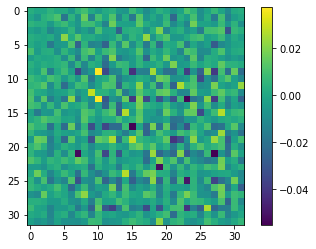

In [10]:
plt.imshow(generated_image[0, :, :, 0])
plt.colorbar()
plt.show()

- (32, 32) shape의 이미지 시각화
- matplotlib 라이브러리는 2차원 이미지만 보여줄 수 있으므로 0번째와 3번째 축의 인덱스를 0으로 설정
- 이미지가 생성자 출력 규격에 맞음

---

### 2.3 판별자 모델 구현하기

- (32, 32, 3)의 이미지를 입력으로 받아 1dim을 판별결과를 출력하는 판별자 모델 구현 함수를 작성해 보기

- 위 2.2에서 생성한 랜덤 이미지를 판별자 모델이 판별한 결과값을 확인해 보기

In [11]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Dropout(0.5))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Dropout(0.5))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(1))

    return model

- 생성자와 마찬가지로 make_discriminator_model 함수로 판별자를 생성할 수 있게 함
- Conv2D 레이어로 이미지의 사이즈를 점차 줄여나감
- (32, 32, 3) > (16, 16, 64) > (8, 8, 128) 순으로 작아짐
- Flatten 레이어로 3차원 이미지(8x8x128)를 1차원(1,8192)형상의 벡터로 변환
- Dense레이어로 단 하나의 값 출력

In [12]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

- 판별 모델을 discriminator라는 변수에 저장
- summary로 모델 세부 내용 출력

---

### 2.4 손실함수와 최적화 함수 구현하기

- 생성자와 판별자의 손실함수(loss)를 구현해 보기

- 판별자의 출력값을 가지고 실제/생성(real/fake) 이미지 판별 정확도(accuracy)를 계산하는 함수를 구현해 보기

- 생성자와 판별자를 최적화하는 optimizer를 정의하기

In [13]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

- tf.keras.losses의 이진 교차 엔트로피 함수를 사용
- 이번 이진 교차 엔트로피 클래스의 경우 인풋값이 0-1 사이에 분포하는 확률값이라 가정하기 때문에, from_logits=True 로 설정해주어야 추후 시그모이드 함수를 사용해 0~1 사이의 값으로 정규화한 후 알맞게 계산이 가능

In [14]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

- generator_loss는 생성자의 로스
- generator_loss는 fake_output이 1에 가까워지기를 바란다. 따라서 tf.ones_like 와의 교차 엔트로피 값을 계산함

In [15]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

- discriminator_loss는 판별자의 로스
- 생성자와는 다르게 discriminator_loss는 real_output 값은 1에 가까워지기를, fake_output 값은 0에 가까워지기를 바라므로, 두 가지 loss값을 모두 계산


In [16]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

- real output과 fake output의 정확도가 각각 0.5에 가까워지는 것이 이상적인 정확도
- tf.math.greater_equal(real_output, tf.constant([0.5]) : real_output의 각 원소가 0.5 이상인지 True, False로 판별
- tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32): 위의 결과가 True이면 1.0, False이면 0.0으로 변환
- tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32)): 위의 결과를 평균내어 이번 배치의 정확도를 계산

In [17]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1=0.5)

- tf.keras.optimizers의 최적화 함수로 Adam을 사용
- 생성자와 판별자는 따로 학습을 진행하는 개별 네트워크이기 때문에, optimizer를 개별로 만들어주어야 함

In [18]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

- 매번 학습의 진행을 확인하기 위해 (16,100)형상의 벡터로 샘플 생성
- 100차원의 노이즈 총 16장을 의미

---

### 2.5 훈련과정 상세 기능 구현하기

- 1개 미니배치의 훈련 과정을 처리하는 train_step() 함수를 구현해 보기

- 16개의 고정된 seed를 입력으로 하여 훈련 과정 동안 생성한 이미지를 시각화하는 generate_and_save_images() 함수를 구현해 보기

- 훈련 epoch마다 생성자/판별자의 loss 및 판별자의 실제/생성(real/fake) 이미지 판별 accuracy 히스토리(history)를 그래프로 시각화하는 draw_train_history() 함수를 구현해 보기

- training_checkpoints 디렉토리에 몇 epoch마다 모델을 저장하는 checkpoint 모듈을 설정해 보기

In [19]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

- @tf.function: 이 데코레이터는 사용될 함수에 입력된 입력은 Tensorflow의 graph 노드가 될 수 있는 타입으로 자동 변환시킴

- def train_step(): 하나의 미니 배치 당 진행할 train_step 함수 구현
- (1) 입력 데이터: Real Image 역할을 할 images 한 세트를 입력으로 받음
- (2) 생성자 입력 노이즈 : generator가 FAKE IMAGE를 생성하기 위한 noise를 images 한 세트와 같은 크기인 BATCH_SIZE 만큼 생성함
- (3) tf.GradientTape()는 가중치 갱신을 위한 Gradient를 자동 미분으로 계산하기 위해 with 구문 열기
- (4) generated_images 생성 : generator가 noise를 입력받은 후 generated_images 생성
- (5) discriminator 판별 : discriminator가 Real Image인 images와 Fake Image인 generated_images를 각각 입력받은 후 real_output, fake_output 출력
- (6) loss 계산 : fake_output, real_output으로 generator와 discriminator 각각의 loss 계산
- (7) accuracy 계산 : fake_output, real_output으로 discriminator의 정확도 계산
- (8) gradient 계산 : gen_tape와 disc_tape를 활용해 gradient를 자동으로 계산
- (9) 모델 학습 : 계산된 gradient를 optimizer에 입력해 가중치 갱신
- (10) 리턴값 : 이번 스텝에 계산된 loss와 accuracy를 리턴

In [20]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i]+1)/2.0)
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()
    

- train_step과 함께 일정 간격으로 학습 현황을 볼 수 있는 샘플을 생성하는 함수 생성

- 고정된 seed에 대한 결과물의 현황 확인 가능

- model이 16개의 seed가 들어있는 sample_seeds를 입력받아서 만들어낸 prediction을 matplotlib으로 시각화해주는 과정

- 16개이므로 4행 4열로 나누어 subplot(4, 4, i+1)로 시각화

- plt.savefig()로 plt에 저장되어 보이는 이미지를 파일로 저장

In [21]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/fashion/training_history/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

- train_step() 함수가 리턴하는 gen_loss, disc_loss, real_accuracy, fake_accuracy 이상 4가지 값을 history라는 dict 구조에 리스트로 저장하고 있다가 매 epoch마다 시각화하는 함수 생성

In [22]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/fashion/training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

- tf.train.Checkpoint를 활용하여 정기적으로 모델을 저장

- checkpoint에 optimizer와 생성자, 판별자가 학습한 모델 가중치를 저장


---

### 2.6 학습 과정 진행하기

- 2.4에서 구현한 기능들을 활용하여 최소 50 epoch만큼의 모델 학습을 진행해 보기

- 학습 과정에서 생성된 샘플 이미지로 만든 gif 파일을 통해 학습 진행 과정을 시각적으로 표현해 보기

- 학습 과정을 담은 샘플 이미지, gif 파일, 학습 진행 그래프 이미지를 함께 제출해보기

In [23]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

In [24]:
save_every = 5
EPOCHS = 200

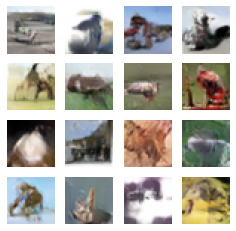

Time for training : 3945 sec


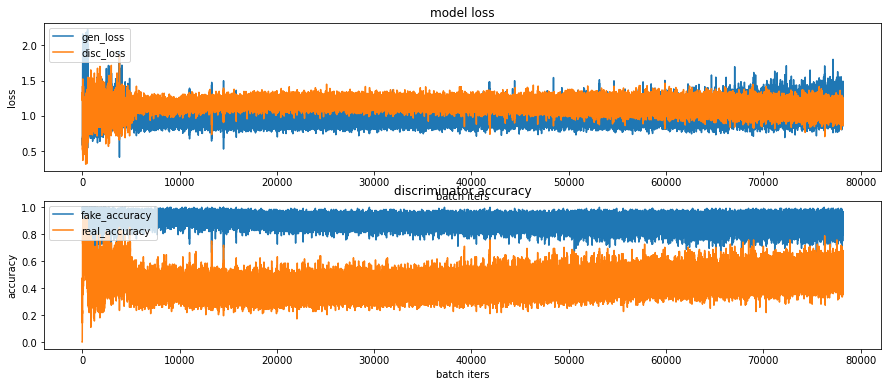

CPU times: user 1h 8min 50s, sys: 7min 28s, total: 1h 16min 18s
Wall time: 1h 5min 51s


In [25]:
%%time
train(train_dataset, EPOCHS, save_every)

In [26]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif

-rw-r--r-- 1 root root 3850453 Feb 15 07:00 /aiffel/aiffel/dcgan_newimage/cifar10/cifar10_dcgan.gif


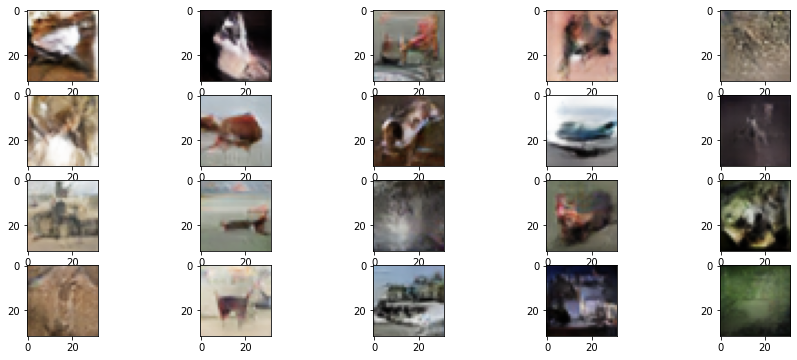

In [27]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
for i in range(20):
    plt.subplot(4, 5, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

In [28]:
save_every = 5
EPOCHS = 500

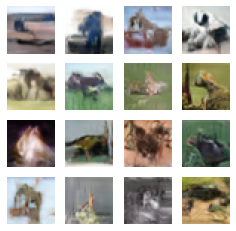

Time for training : 11222 sec


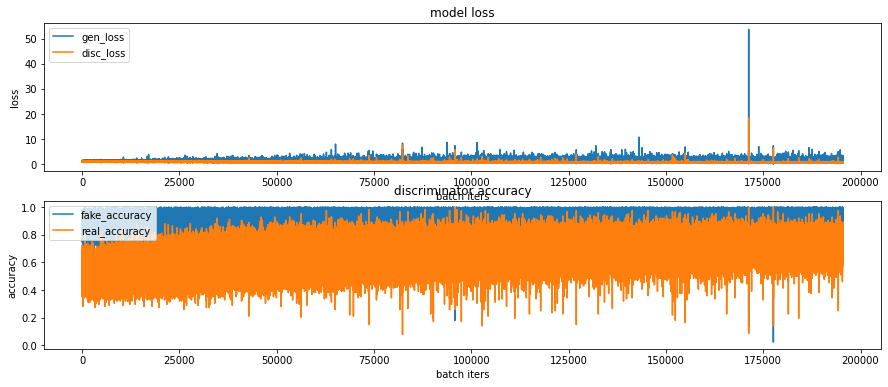

CPU times: user 3h 13min 59s, sys: 19min 20s, total: 3h 33min 20s
Wall time: 3h 7min 13s


In [29]:
%%time
train(train_dataset, EPOCHS, save_every)

In [37]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/fashion/generated_samples/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar10_dcgan3.gif

-rw-r--r-- 1 root root 3643789 Feb 15 12:02 /aiffel/aiffel/dcgan_newimage/cifar10/cifar10_dcgan4.gif


In [33]:
save_every = 5
EPOCHS = 200

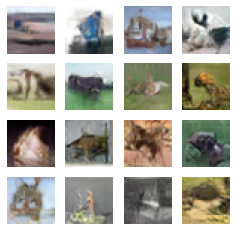

Time for training : 3974 sec


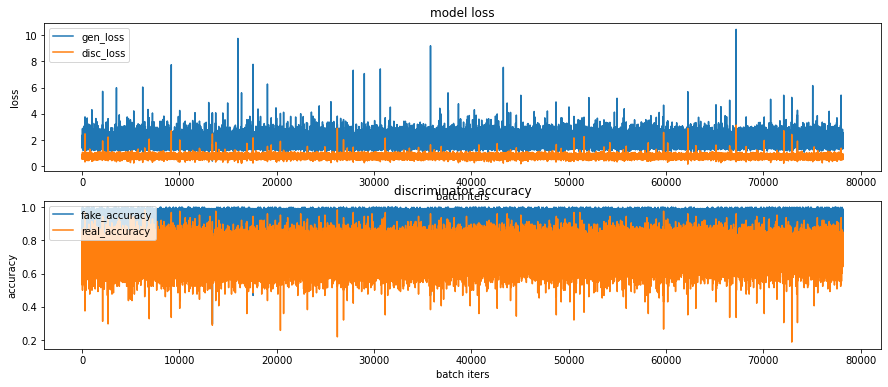

CPU times: user 1h 9min 16s, sys: 7min 29s, total: 1h 16min 46s
Wall time: 1h 6min 19s


In [34]:
%%time
train(train_dataset, EPOCHS, save_every)

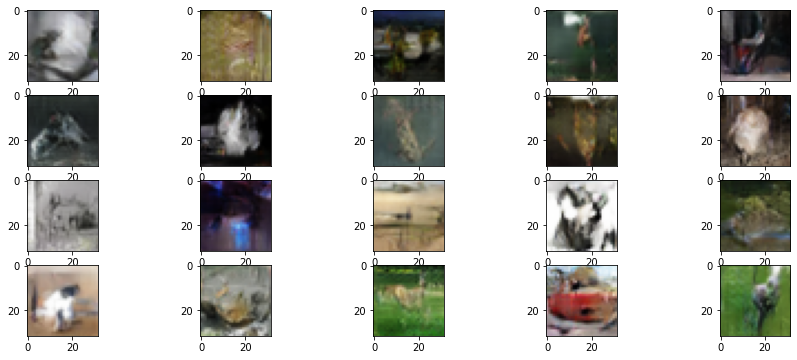

In [35]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)
    
    np_generated = generated_image.numpy()
    np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
    np_generated = np_generated.astype(int)
    plt.imshow(np_generated[0])
plt.show()

---
## 3. 결론

### 3.1 결론

### (optional) GAN 훈련 과정 개선하기

## 1차 시기

BATCH_SIZE = 256

generator_optimizer = Adam(1e-4)

discriminator_optimizer = Adam(1e-4)

**EPOCHS = 200**

![11](https://media.vlpt.us/images/khkk4953/post/26e84338-d2be-428d-837d-7bb21281e1fa/1%EC%B0%A8%EC%8B%9C%EA%B8%B0.png)

> 노드에서는 최소 50 에포크만큼의 모델 학습부터 권고했으나, 다른 교육생분들의 조언으로 200에포크부터 학습을 시도했음. 학습 종료 후에 이미지 출력 색상이 청록색으로 출력이 되어, (predictions[i]+1)/2.0로 조정하여 2차 시기부터는 이미지 출력 색상문제를 해결했음.

---

## 2차 시기

BATCH_SIZE = 256

generator_optimizer = Adam(1e-4)

discriminator_optimizer = Adam(1e-4)

**EPOCHS = 500**

![12](https://media.vlpt.us/images/khkk4953/post/7d68cbc7-98b2-4748-b826-2af27a9dee2e/2%EC%B0%A8%EC%8B%9C%EA%B8%B0.png)

> 1차 시기때 이미지 출력의 문제가 있었기 때문에, 1차 시기와 모델 구조는 동일하게 500에포크로 학습을 진행했음. 500에포크로 학습했음에도, 이미지를 구별하기 어려워 optimizer 등 변화를 주기로 계획.

---


## 3차 시기

BATCH_SIZE = 128

generator_optimizer = Adam(5e-4)

discriminator_optimizer = Adam(5e-4)

LeakyReLU(alpha=2.0)

**EPOCHS = 400**

![13](https://media.vlpt.us/images/khkk4953/post/d274c7d1-3534-4476-8e2a-46b050db8c13/3%EC%B0%A8%EC%8B%9C%EA%B8%B0.png)

> 2차 시기와는 다르게 배치 사이즈를 줄이고, Adam의 디폴트 수치를 (1e-4) > (5e-4) 로 변경했고, 생성자와 판별자 모두 LeakyReLU의 alpha 값을 0.2로 설정 했음. 에포크는 전과 비슷한 400으로 설정하고 학습을 했고, 출력은 흐릿한 부분이 조금 선명해진 기분이 들었음.

---

## 4차 시기

BATCH_SIZE = 128

generator_optimizer = Adam(learning_rate = 0.0002, beta_1=0.5)

discriminator_optimizer = Adam(learning_rate = 0.0002, beta_1=0.5)

LeakyReLU(alpha=0.01)

Dropout 수치 조정 0.3 > 0.5


- 4차 시기(1)

**EPOCHS = 200**

![14](https://media.vlpt.us/images/khkk4953/post/9b9cce80-ed31-4f94-80d2-225865d0e9f8/cifar10_dcgan2.gif)


- 4차 시기(2)

**EPOCHS = 500**

![15](https://media.vlpt.us/images/khkk4953/post/17e7ff78-82b4-46e0-8f85-803b43f7031b/cifar10_dcgan3.gif)


- 4차 시기(3)

**EPOCHS = 200**

![16](https://media.vlpt.us/images/khkk4953/post/8a839f6b-c3fa-4297-aad0-37d682fef4c9/cifar10_dcgan4.gif)


> 마지막 4차 시기는 200에포크 학습 후에, 추가로 500에포크 + 200에포크를 더 학습했음. learning rate를 0.0002로 조정했고, 추가적인 파라미터로 beta_1=0.5를 추가했음. LeakyReLU의 alpha값은 대중적으로 0.01로 사용된다하여 변경했고, 레퍼런스를 통해 Dropout 수치를 0.5로 조정.

---

### 3.2 참조

DeepComposer: https://www.megazone.com/techblog_20191226_aws-deepcomposer-compose-music-with-generative-machine-learning-models/

DCGAN 팁: https://flonelin.wordpress.com/2020/05/20/%EC%95%88%EC%A0%95%EC%A0%81%EC%9D%B8-generative-adversarial-network-%ED%8A%B8%EB%A0%88%EC%9D%B4%EB%8B%9D%EC%9D%84-%EC%9C%84%ED%95%9C-%ED%8C%81%EB%93%A4/

---

### 3.3 회고

이번 익플 노드는 지금껏 진행했던 프로젝트 중에서 가장 난이도 있지 않았나 생각이 든다. 지난 주 노드에 회고를 작성할 때 제출날까지 당일 노드를 하지 않겠다고 다짐했는데, 워낙 학습시간이 길다보니 제출날까지 모델 학습을 진행하는 상황이 발생했다. 많은 학습을 진행했으나 결론적으로 생성이미지 품질이 향상된 것인지 잘 모르겠다. 이미지가 조금의 변화는 있었던 것 같긴하나, 노드에서 의도하는 대로 'CIFAR-10' 이미지에 맞게끔 만들기는 어려웠던 것 같다.

아직까지 무엇을 어떤 방향으로 조절해야 더 나은 결과를 만들어낼수 있을지 결론내기 어려운 부분이 있다. 작성된 코드를 보았을 때에는 '아 이건 이렇기 때문에 사용하구나'라는 정도의 깨달음은 있으나, '이걸 시도하기 위해서는 무엇을 해야하지?'라는 생각이 들 때 '아 이건 이렇게 해야되지.' 라는 판단이 서지가 않는다고 해야할까. 최대한 시행착오를 겪으며 배우고 싶었는데 훈련부터 이미지를 출력하기까지 학습시간이 굉장히 많이 소요됐기에 많은 시도를 해보지 못한 것이 아쉽다.




---